In [1]:
# Import requisite libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import os
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")

In [2]:
# Importing necessary ML libraries/modules

#data transformation
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Linear Regression Model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Decision Tree Regressor Model
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree

# Support Vector Regression Model
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [3]:
# Load dataset
data = pd.read_excel("Cleaned dataset.xlsx")
data

,Model Year,Manufacturer Name,Division,Carline,Fuel efficiency (mpg),CO2 emissions (g/km),Eng Displacement(Litres),Number of Cylinders,Number of Gears,Total Intake Valves,Total Exhaust Valves,Max Ethanol % - Gasoline,Transmission
0,2020,Honda,Acura,NSX,21,420,3.5,6,9,12,12,E10,Auto(AM-S9)
1,2020,FCA US LLC,ALFA ROMEO,4C,28,317,1.8,4,6,8,8,E10,Auto(AM6)
2,2020,aston martin,Aston Martin Lagonda Ltd,Vantage Manual,17,541,4.0,8,7,16,16,E10,Manual(M7)
3,2020,aston martin,Aston Martin Lagonda Ltd,Vantage V8,20,435,4.0,8,8,16,16,E10,Auto(S8)
4,2020,Volkswagen Group of,Audi,R8,16,556,5.2,10,7,20,20,E15,Auto(AM-S7)
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12584,2024,Toyota,TOYOTA,HIGHLANDER HYBRID AWD,35,254,2.5,4,6,8,8,E15,Auto(AV-S6)
12585,2024,Toyota,TOYOTA,HIGHLANDER HYBRID AWD LTD/PLAT,35,253,2.5,4,6,8,8,E15,Auto(AV-S6)
12586,2024,Toyota,TOYOTA,SEQUOIA 4WD,20,439,3.4,6,10,12,12,E15,Auto(S10)
12587,2024,Volvo,"Volvo Cars of North America, LLC",XC90 B5 AWD,24,369,2.0,4,8,8,8,E10,Auto(S8)


In [4]:
# Displaying information about the DataFrame, including data types and missing values
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12589 entries, 0 to 12588
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Model Year                12589 non-null  int64  
 1   Manufacturer Name         12589 non-null  object 
 2   Division                  12589 non-null  object 
 3   Carline                   12589 non-null  object 
 4   Fuel efficiency (mpg)     12589 non-null  int64  
 5   CO2 emissions (g/km)      12589 non-null  int64  
 6   Eng Displacement(Litres)  12589 non-null  float64
 7   Number of Cylinders       12589 non-null  int64  
 8   Number of Gears           12589 non-null  int64  
 9   Total Intake Valves       12589 non-null  int64  
 10  Total Exhaust Valves      12589 non-null  int64  
 11  Max Ethanol % - Gasoline  12589 non-null  object 
 12  Transmission              12589 non-null  object 
dtypes: float64(1), int64(7), object(5)
memory usage: 1.2+ MB


In [5]:
# Displaying the column names of the DataFrame
data.columns


Index(['Model Year', 'Manufacturer Name', 'Division', 'Carline',
       'Fuel efficiency (mpg)', 'CO2 emissions (g/km)',
       'Eng Displacement(Litres)', 'Number of Cylinders ', 'Number of Gears',
       'Total Intake Valves ', 'Total Exhaust Valves',
       'Max Ethanol % - Gasoline', 'Transmission'],
      dtype='object')

## Creating new DataFrame with necessary columns 

In [6]:
# Define the list of necessary columns for analysis
columns_needed = ["Manufacturer Name", "Carline", "Fuel efficiency (mpg)", "CO2 emissions (g/km)", 
                  "Eng Displacement(Litres)", "Number of Cylinders ", "Transmission"]

# Create the new DataFrame with only the necessary columns
df = data[columns_needed].copy()
df

,Manufacturer Name,Carline,Fuel efficiency (mpg),CO2 emissions (g/km),Eng Displacement(Litres),Number of Cylinders,Transmission
0,Honda,NSX,21,420,3.5,6,Auto(AM-S9)
1,FCA US LLC,4C,28,317,1.8,4,Auto(AM6)
2,aston martin,Vantage Manual,17,541,4.0,8,Manual(M7)
3,aston martin,Vantage V8,20,435,4.0,8,Auto(S8)
4,Volkswagen Group of,R8,16,556,5.2,10,Auto(AM-S7)
...,...,...,...,...,...,...,...
12584,Toyota,HIGHLANDER HYBRID AWD,35,254,2.5,4,Auto(AV-S6)
12585,Toyota,HIGHLANDER HYBRID AWD LTD/PLAT,35,253,2.5,4,Auto(AV-S6)
12586,Toyota,SEQUOIA 4WD,20,439,3.4,6,Auto(S10)
12587,Volvo,XC90 B5 AWD,24,369,2.0,4,Auto(S8)


## Exploratory Data Analysis

In [7]:
# Display basic information about the DataFrame
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12589 entries, 0 to 12588
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Manufacturer Name         12589 non-null  object 
 1   Carline                   12589 non-null  object 
 2   Fuel efficiency (mpg)     12589 non-null  int64  
 3   CO2 emissions (g/km)      12589 non-null  int64  
 4   Eng Displacement(Litres)  12589 non-null  float64
 5   Number of Cylinders       12589 non-null  int64  
 6   Transmission              12589 non-null  object 
dtypes: float64(1), int64(3), object(3)
memory usage: 688.6+ KB
None


In [8]:
# Summary statistics
print(df.describe())

       Fuel efficiency (mpg)  CO2 emissions (g/km)  Eng Displacement(Litres)  \
count           12589.000000          12589.000000              12589.000000   
mean               23.083962            408.691636                  3.139201   
std                 6.058057             99.640470                  1.325008   
min                 9.000000            151.000000                  0.900000   
25%                19.000000            338.000000                  2.000000   
50%                22.000000            399.000000                  3.000000   
75%                26.000000            470.000000                  3.700000   
max                59.000000            979.000000                  8.400000   

       Number of Cylinders   
count          12589.000000  
mean               5.619271  
std                1.869600  
min                3.000000  
25%                4.000000  
50%                6.000000  
75%                6.000000  
max               16.000000  


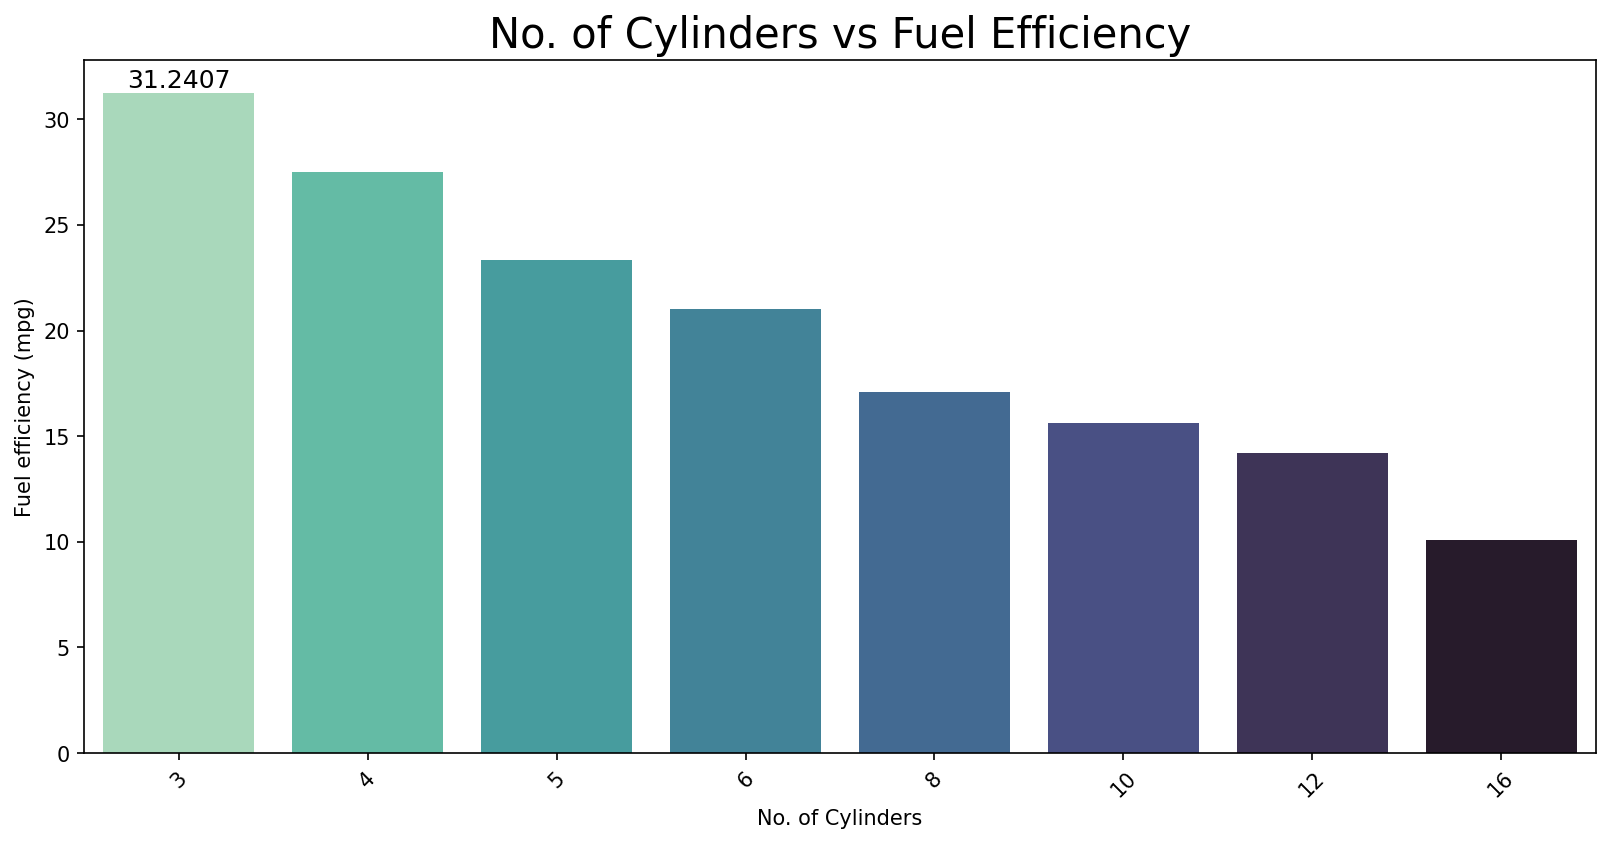

In [9]:
# Comparison between No. of cylinders & Fuel consumption
plt.figure(figsize=(13,6), dpi=150)
plt.xticks(rotation=45)
plt.title('No. of Cylinders vs Fuel Efficiency',size=20)
chart1=sns.barplot( data=df, x="Number of Cylinders ", y="Fuel efficiency (mpg)",palette='mako_r', ci=None)
plt.xlabel('No. of Cylinders')
plt.ylabel('Fuel efficiency (mpg)')
chart1.bar_label(chart1.containers[0],size=12)
plt.show()

#### Bar graph interpretation
The graph illustrates the relationship between the number of cylinders in a vehicle's engine and its fuel efficiency, measured in miles per gallon (MPG). Each bar represents the average fuel efficiency for vehicles with a specific cylinder count, ranging from 4 cylinders to higher counts like 6, 8, and beyond. Upon examination, several observations can be made. Firstly, there appears to be a discernible trend where vehicles with fewer cylinders tend to exhibit higher fuel efficiency. This trend suggests that smaller engines, with fewer cylinders, are generally more fuel-efficient than larger ones. Overall, the graph provides valuable insights into how engine design, specifically the number of cylinders, impacts fuel consumption in vehicles, aiding in understanding and comparing fuel efficiency across different vehicle models.

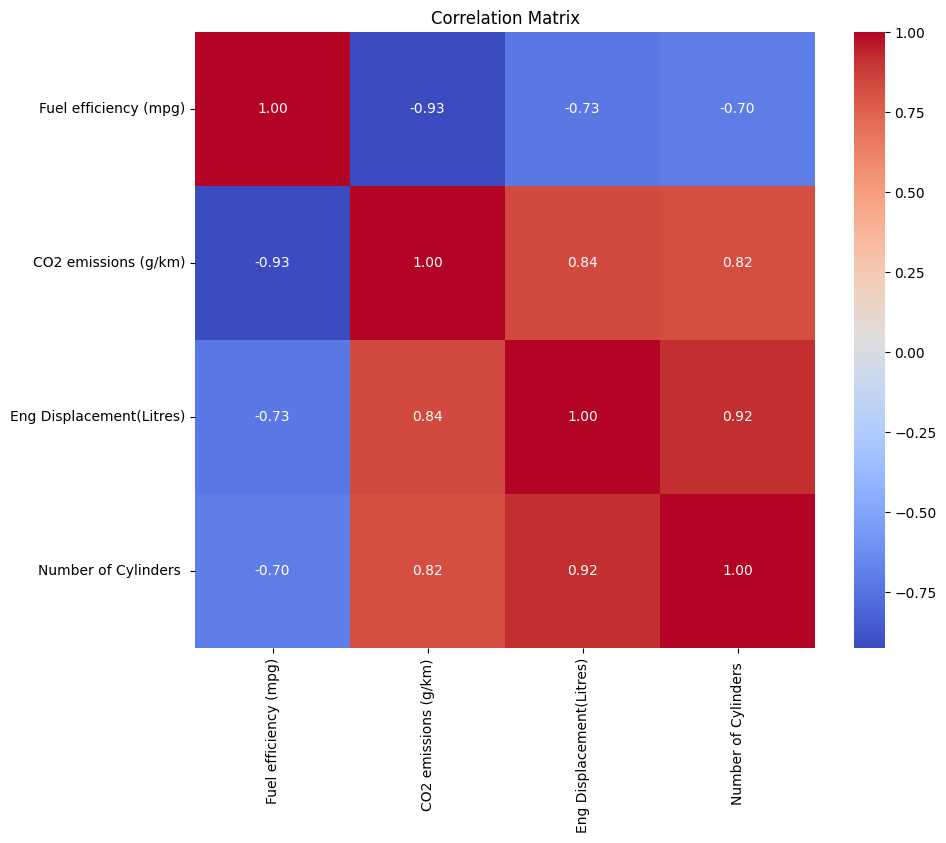

In [10]:
# Select only numerical columns for the correlation matrix
numerical_columns = ["Fuel efficiency (mpg)", "CO2 emissions (g/km)", "Eng Displacement(Litres)", "Number of Cylinders "]

# Calculate the correlation matrix
corr_matrix = df[numerical_columns].corr()

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

#### Interpretation of the heatmap
The correlation heatmap provides insights into the relationships between pairs of numerical variables in the dataset. Positive correlations, depicted by warmer colors, indicate that variables tend to move in the same direction, while negative correlations, represented by cooler colors, suggest opposite movements. Strong correlations, reflected by values closer to 1 or -1, signify a pronounced association between variables, whereas values approaching 0 indicate weaker or negligible relationships. For instance, a strong positive correlation between "Fuel efficiency (mpg)" and "Eng Displacement(Litres)" suggests that higher engine displacement tends to correlate with lower fuel efficiency. Conversely, a negative correlation between "CO2 emissions (g/km)" and "Fuel efficiency (mpg)" implies that as CO2 emissions increase, fuel efficiency tends to decrease. By examining the heatmap, we can identify key relationships between variables, aiding in understanding their interplay and informing further analysis or modeling decisions.

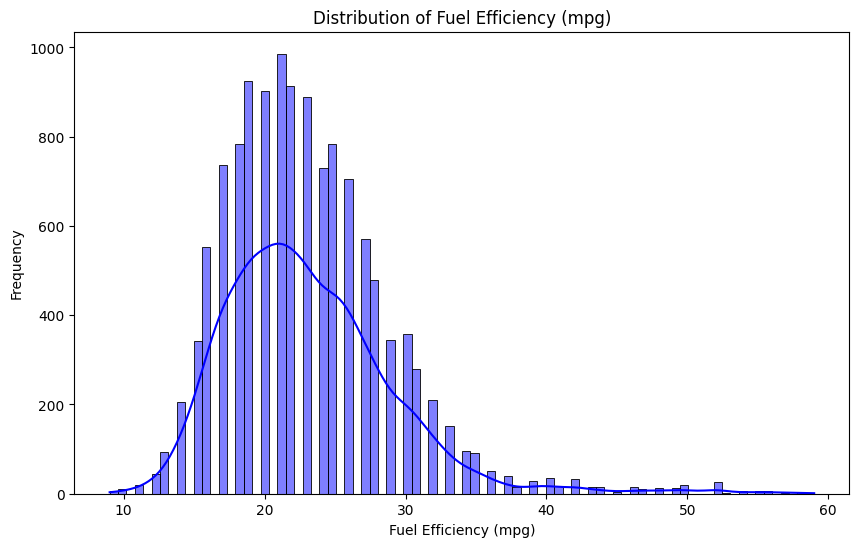

In [11]:
# Distribution of fuel efficiency
plt.figure(figsize=(10, 6))
sns.histplot(df["Fuel efficiency (mpg)"], kde=True, color="blue")
plt.title("Distribution of Fuel Efficiency (mpg)")
plt.xlabel("Fuel Efficiency (mpg)")
plt.ylabel("Frequency")
plt.show()

#### Interpretation of the histogram

The histogram of fuel efficiency (mpg) illustrates the frequency distribution of fuel efficiency values among the car models in the dataset. Each bar represents the number of car models that fall within a specific range of fuel efficiency. The graph provides insights into the spread and concentration of fuel efficiency values across the dataset, highlighting the most common fuel efficiency ratings and any potential outliers. The shape of the histogram indicates the relative prevalence of different fuel efficiency values, while the absence of visible skewness or asymmetry suggests a relatively uniform distribution of fuel efficiency values among the car models.

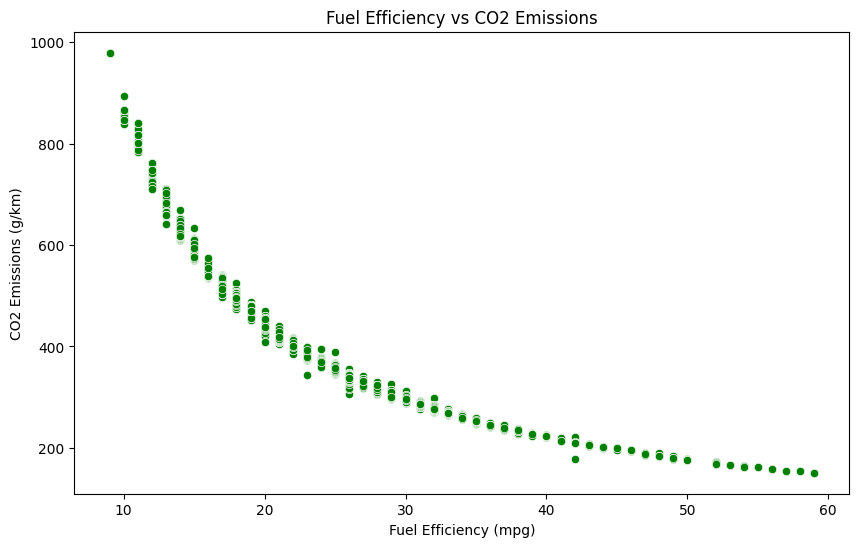

In [12]:
# Relationship between fuel efficiency and CO2 emissions
plt.figure(figsize=(10, 6))
sns.scatterplot(x="Fuel efficiency (mpg)", y="CO2 emissions (g/km)", data=df, color="green")
plt.title("Fuel Efficiency vs CO2 Emissions")
plt.xlabel("Fuel Efficiency (mpg)")
plt.ylabel("CO2 Emissions (g/km)")
plt.show()

#### Scatter plot interpretation
The scatter plot visualizes the relationship between fuel efficiency (measured in miles per gallon, mpg) and CO2 emissions (measured in grams per kilometer, g/km) for the car models in the dataset. Each data point represents a specific car model, with its position on the plot determined by its fuel efficiency and CO2 emissions values. The plot illustrates a general inverse relationship between fuel efficiency and CO2 emissions: as fuel efficiency increases (moving towards the right on the x-axis), CO2 emissions tend to decrease (moving downwards on the y-axis), and vice versa. This negative correlation suggests that more fuel-efficient cars tend to emit lower levels of CO2, while less fuel-efficient cars produce higher levels of CO2 emissions. The dispersion of data points around the trendline indicates variability among car models, with some outliers deviating from the general trend. Overall, the scatter plot provides a clear visual representation of the trade-off between fuel efficiency and CO2 emissions in the dataset, highlighting the environmental implications of different car models' performance.

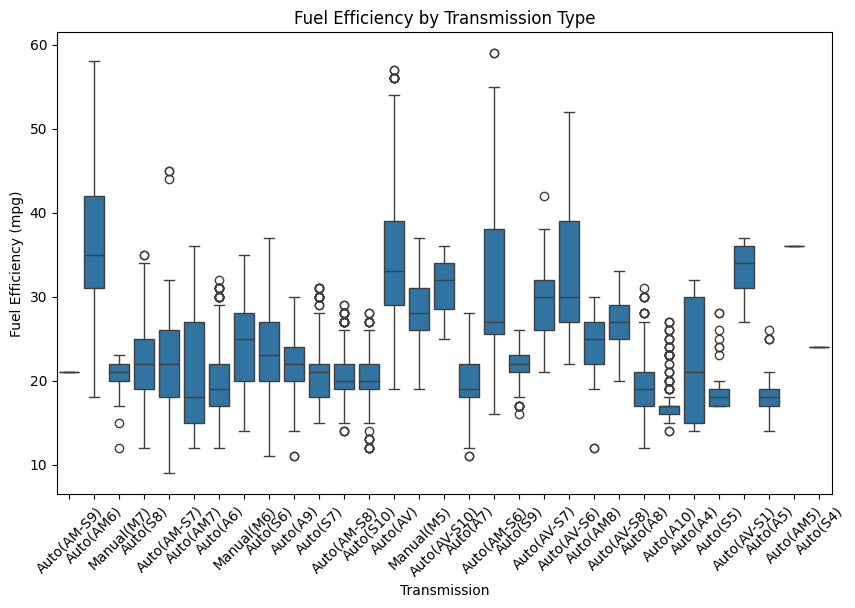

In [13]:
# Box plot of fuel efficiency by transmission type
plt.figure(figsize=(10, 6))
sns.boxplot(x="Transmission", y="Fuel efficiency (mpg)", data=df)
plt.title("Fuel Efficiency by Transmission Type")
plt.xlabel("Transmission")
plt.ylabel("Fuel Efficiency (mpg)")
plt.xticks(rotation=45)
plt.show()

#### Box plot interpretation
The box plot visualizes the distribution of fuel efficiency (measured in miles per gallon, mpg) across different transmission types of car models in the dataset. Each box represents a transmission type, with the central line indicating the median fuel efficiency value. The box itself represents the interquartile range (IQR), where the lower and upper hinges represent the first and third quartiles, respectively. The whiskers extend to the minimum and maximum values within 1.5 times the IQR from the first and third quartiles, respectively. Data points beyond the whiskers are considered outliers and are plotted individually. By comparing the box plots for different transmission types, we can observe variations in fuel efficiency distributions. This analysis allows us to discern potential differences in fuel efficiency performance across different transmission types, providing insights for consumers and manufacturers alike.

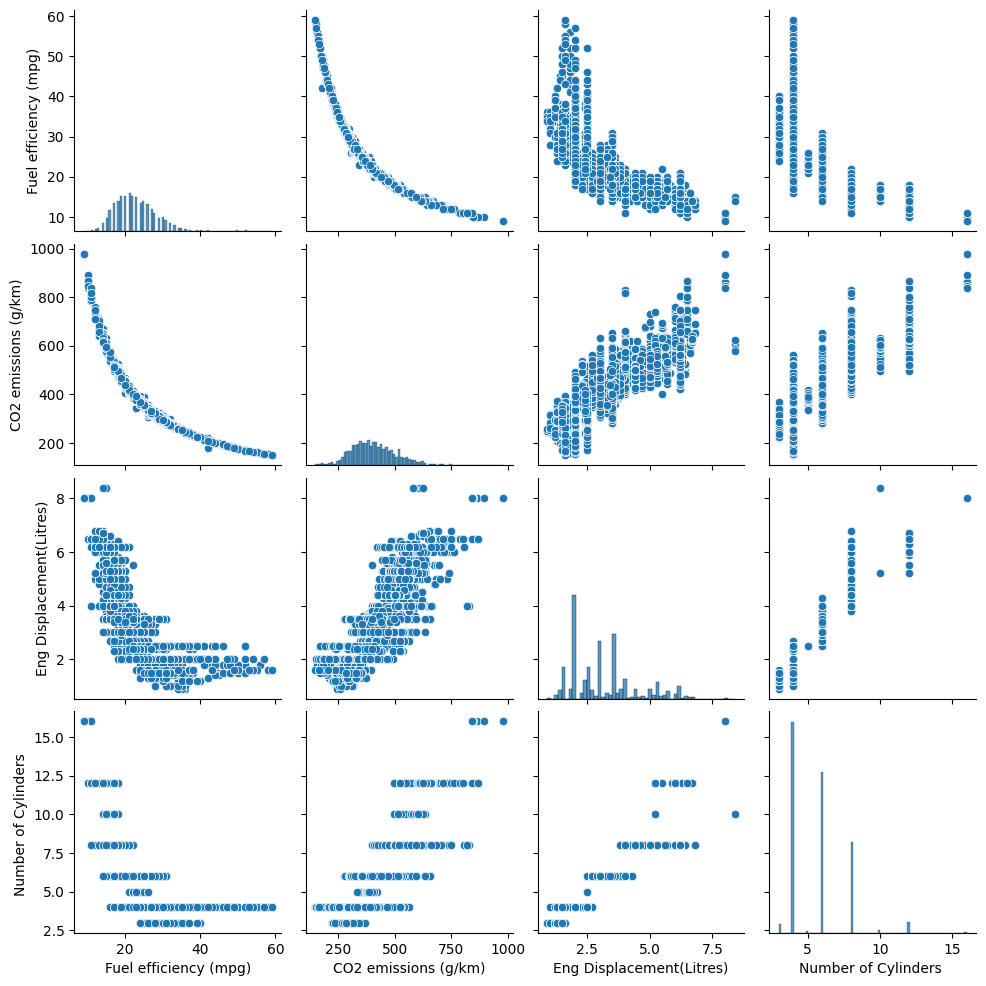

In [14]:
# Pairplot for selected features
sns.pairplot(df[["Fuel efficiency (mpg)", "CO2 emissions (g/km)", "Eng Displacement(Litres)", "Number of Cylinders "]])
plt.show()

#### Pairplot interpretation
The pairplot displays scatter plots for pairwise combinations of selected features: "Fuel efficiency (mpg)", "CO2 emissions (g/km)", "Eng Displacement(Litres)", and "Number of Cylinders". 

1. **Fuel Efficiency vs. CO2 Emissions**: The scatter plot shows the relationship between fuel efficiency and CO2 emissions. As expected, there's a negative correlation, meaning that higher fuel efficiency tends to correspond with lower CO2 emissions.

2. **Fuel Efficiency vs. Engine Displacement**: This scatter plot illustrates the relationship between fuel efficiency and engine displacement. It likely shows a negative correlation as well, indicating that cars with larger engine displacements tend to have lower fuel efficiency.

3. **Fuel Efficiency vs. Number of Cylinders**: This plot examines how fuel efficiency relates to the number of cylinders in the engine. It's expected to show a negative correlation, as cars with more cylinders typically have larger engine displacements, which often result in lower fuel efficiency.

4. **CO2 Emissions vs. Engine Displacement**: This scatter plot explores the relationship between CO2 emissions and engine displacement. It's likely to show a positive correlation, as larger engine displacements are often associated with higher CO2 emissions due to increased fuel consumption.

5. **CO2 Emissions vs. Number of Cylinders**: This plot examines how CO2 emissions relate to the number of cylinders. Similar to the previous plots, it's expected to show a positive correlation, indicating that cars with more cylinders tend to emit more CO2.

6. **Engine Displacement vs. Number of Cylinders**: This plot visualizes the relationship between engine displacement and the number of cylinders. It's expected to show a positive correlation, as larger engine displacements typically correspond with more cylinders.

These pairplots provide a comprehensive overview of the relationships between the selected features, enabling us to identify patterns and correlations that may inform further analysis or modeling decisions.

# Data Processing

### Encoding Categorical Variables

In [15]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

df['Transmission_LabelEncoded'] = label_encoder.fit_transform(df['Transmission'])

In [16]:
df.head(30)

,Manufacturer Name,Carline,Fuel efficiency (mpg),CO2 emissions (g/km),Eng Displacement(Litres),Number of Cylinders,Transmission,Transmission_LabelEncoded
0,Honda,NSX,21,420,3.5,6,Auto(AM-S9),10
1,FCA US LLC,4C,28,317,1.8,4,Auto(AM6),12
2,aston martin,Vantage Manual,17,541,4.0,8,Manual(M7),30
3,aston martin,Vantage V8,20,435,4.0,8,Auto(S8),26
4,Volkswagen Group of,R8,16,556,5.2,10,Auto(AM-S7),8
5,Volkswagen Group of,R8 Spyder,16,556,5.2,10,Auto(AM-S7),8
6,Volkswagen Group of,TT Roadster quattro,26,340,2.0,4,Auto(AM-S7),8
7,BMW,Z4 M40i,26,334,3.0,6,Auto(S8),26
8,BMW,Z4 sDrive30i,27,324,2.0,4,Auto(S8),26
9,Volkswagen Group of,Chiron,11,840,8.0,16,Auto(AM-S7),8


Categorical variables, such as "Transmission," need to be converted into numerical format before feeding them into machine learning models.
Label encoding is a common technique used to handle categorical variables with no inherent order. It assigns a unique integer for each category under transmission.
This step ensures that the model can interpret categorical variables appropriately without introducing bias based on numerical representations.

### Splitting the Dataset

Splitting the dataset into training and testing sets allows us to assess the performance of the trained model on unseen data.
The training set is used to train the model, while the testing set is used to evaluate its performance.
A common split ratio is 80% for training and 20% for testing, but this can be adjusted based on the size and complexity of the dataset.

In [17]:
# dropping non-numerical variables for model training 
X = df.drop(['Manufacturer Name', 'Carline', 'Transmission', 'Fuel efficiency (mpg)'], axis = 1 )

In [18]:
X.head(10)

,CO2 emissions (g/km),Eng Displacement(Litres),Number of Cylinders,Transmission_LabelEncoded
0,420,3.5,6,10
1,317,1.8,4,12
2,541,4.0,8,30
3,435,4.0,8,26
4,556,5.2,10,8
5,556,5.2,10,8
6,340,2.0,4,8
7,334,3.0,6,26
8,324,2.0,4,26
9,840,8.0,16,8


In [19]:
y = df['Fuel efficiency (mpg)']

In [20]:
# y variable converted into a data frame for model training
y.to_frame()

,Fuel efficiency (mpg)
0,21
1,28
2,17
3,20
4,16
...,...
12584,35
12585,35
12586,20
12587,24


In [21]:
#splitting dataset into tranining and testing data
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size = 0.2, random_state = 45)

In [22]:
Xtrain

,CO2 emissions (g/km),Eng Displacement(Litres),Number of Cylinders,Transmission_LabelEncoded
1113,861,6.5,12,8
7568,397,3.0,6,25
9076,589,3.6,6,5
1793,551,5.3,8,5
12464,431,3.0,6,26
...,...,...,...,...
163,269,1.4,4,15
11808,412,3.0,6,5
6012,334,2.0,4,26
6558,580,6.6,12,26


In [23]:
ytrain

1113     10
7568     23
9076     15
1793     16
12464    21
         ..
163      33
11808    21
6012     27
6558     15
7115     20
Name: Fuel efficiency (mpg), Length: 10071, dtype: int64

### Feature Scaling

Feature scaling ensures that all numerical features have a similar scale, preventing some features from dominating the model training process due to their larger magnitudes. StandardScaler is a widely used scaling technique that standardizes features by subtracting the mean and dividing by the standard deviation. Scaling the features can improve the convergence speed of some machine learning algorithms, such as gradient descent-based methods. This step is particularly important for models that rely on distance-based calculations or regularization techniques, where feature scales can significantly impact model performance.

In [24]:
st_scaler = StandardScaler()

In [25]:
Xtrain = st_scaler.fit_transform(Xtrain)

In [26]:
Xtrain

array([[ 4.5545348 ,  2.55763261,  3.42920872, -1.02471737],
       [-0.1169187 , -0.10147276,  0.20665594,  0.73985207],
       [ 1.81609655,  0.35437387,  0.20665594, -1.33611198],
       ...,
       [-0.75118932, -0.86121715, -0.86752831,  0.84365027],
       [ 1.72548646,  2.63360704,  3.42920872,  0.84365027],
       [ 0.28579281,  0.50632275,  0.20665594,  1.15504487]])

In [27]:
Xtest = st_scaler.transform(Xtest)

In [28]:
Xtest

array([[-0.66057923, -0.5573194 , -0.86752831,  0.22086105],
       [ 0.33613175, -0.10147276,  0.20665594, -0.92091917],
       [ 0.57775866,  0.27839943,  0.20665594,  0.32465926],
       ...,
       [-0.05651197, -0.10147276,  0.20665594, -1.23231378],
       [ 1.64494415,  1.5699649 ,  2.35502446, -1.02471737],
       [-0.63037587, -0.86121715, -0.86752831,  0.84365027]])

# Training Models

## Decision Tree Regressor

In [29]:
# Initialize DecisionTreeRegressor with a maximum depth of 4
dc = DecisionTreeRegressor(max_depth=4)

Setting the max_depth parameter when initializing a decision tree model, such as to a value like 4, serves multiple purposes. Primarily, it acts as a regularizer, preventing the model from becoming overly complex and prone to overfitting the training data. By limiting the depth of the tree, the model captures simpler patterns and avoids memorizing noise or outliers in the training dataset. Additionally, shallow trees are more interpretable, making them easier to understand and explain to stakeholders. They also offer computational efficiency, requiring fewer resources for both training and prediction. Moreover, by encouraging the model to learn higher-level features and relationships, limited-depth trees tend to generalize better to unseen data, enhancing the model's predictive performance beyond the training set. Thus, setting an appropriate max_depth facilitates a balance between model complexity and generalization capability, crucial for effective decision tree modeling.

In [30]:
# Train the decision tree model on training data
dc.fit(Xtrain, ytrain)

DecisionTreeRegressor(max_depth=4)

The dc.fit() method plays a pivotal role in the machine learning pipeline, particularly when working with decision tree models. This method is where the model is trained on the provided training data, enabling it to learn patterns and relationships inherent in the dataset. By analyzing the features and corresponding target values, the decision tree algorithm estimates parameters and constructs a tree structure that best fits the training data. Through recursive splitting based on feature values, the model minimizes impurity and defines decision rules at each node. Ultimately, dc.fit() transforms raw data into a trained model capable of making predictions on unseen data, serving as a foundational step in the process of building effective machine learning models.


In [31]:
# Make predictions on testing data
ypred = dc.predict(Xtest)

In [32]:
# Evaluate model performance

# Calculate R-squared score on the training set
train_score = dc.score(Xtrain, ytrain)
print("Training R-squared score:", train_score)

# Calculate R-squared score on the testing set
test_score = dc.score(Xtest, ytest)
print("Testing R-squared score:", test_score)

# Calculate R-squared score using ytest and predicted values
r2 = r2_score(ytest, ypred)
print("R-squared score (using ytest and predicted values):", r2)

Training R-squared score: 0.9884207539298542
Testing R-squared score: 0.9884288954825198
R-squared score (using ytest and predicted values): 0.9884288954825198


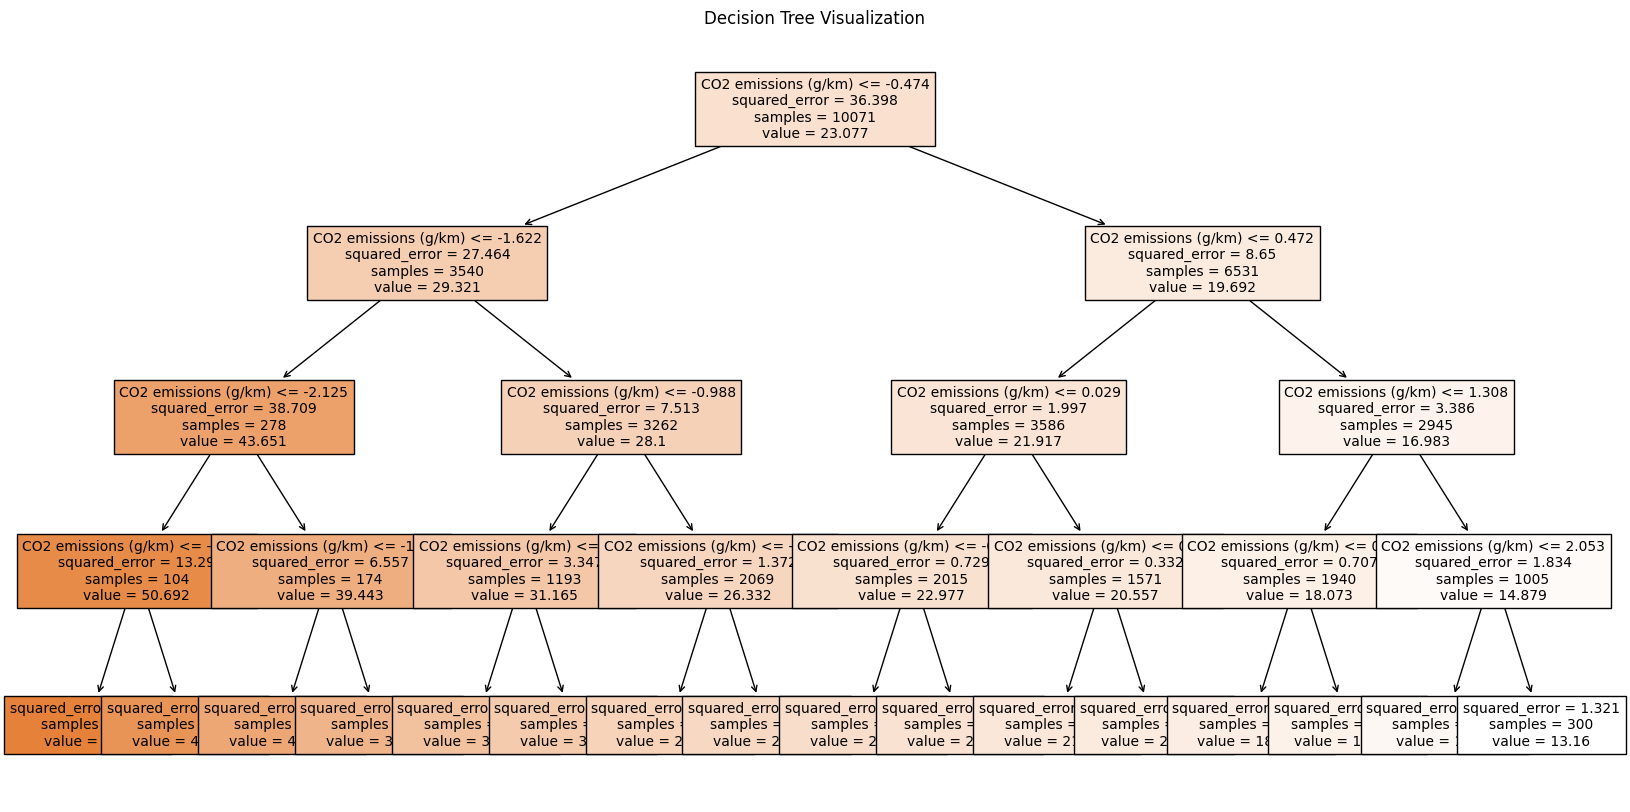

In [33]:
# Visualizing the decision tree
plt.figure(figsize=(20, 10))
tree.plot_tree(dc, feature_names=['CO2 emissions (g/km)', 'Eng Displacement(Litres)', 'Number of Cylinders', 'Transmission_LabelEncoded'], filled=True, fontsize=10)
plt.title('Decision Tree Visualization')
plt.show()


The image represents a decision tree visualization for predicting or analyzing CO2 emissions. The root node shows the total samples (10071) and overall CO2 emissions value (23.077 g/km). The tree recursively splits based on different thresholds of CO2 emissions (g/km) values, creating internal nodes with splitting criteria, squared error, number of samples, and mean emissions value. Leaf nodes represent final predictions/decisions with squared error, sample count, and mean emissions value. The tree structure allows hierarchical decision-making based on emissions values, splitting data into subsets with more specific predictions. Squared error values indicate prediction error/impurity within sample subsets. This interpretable representation can aid understanding relationships between CO2 emissions and other factors, enabling predictions and decisions based on emissions values.

## Linear Regression

In [34]:
# Import Linear Regression model
from sklearn.linear_model import LinearRegression
# Initialize Linear Regression model
lr = LinearRegression()

In [35]:
# Train the model on training data
lr.fit(Xtrain, ytrain)

LinearRegression()

In [36]:
# Print the intercept of the linear regression model
print("Intercept:", lr.intercept_)

Intercept: 23.076556449210603


In [37]:
# Evaluate model performance

# Calculate R-squared score on the training set
train_score = lr.score(Xtrain, ytrain)
print("Training R-squared score:", train_score)

# Calculate R-squared score on the testing set
test_score = lr.score(Xtest, ytest)
print("Testing R-squared score:", test_score)


Training R-squared score: 0.8660669591352947
Testing R-squared score: 0.8769617677923288


In [38]:
# Make predictions on testing data
ypred = lr.predict(Xtest)

In [39]:
# Calculate R-squared score using ytest and predicted values
r2 = r2_score(ytest, ypred)
print("R-squared score (using ytest and predicted values):", r2)

R-squared score (using ytest and predicted values): 0.8769617677923288


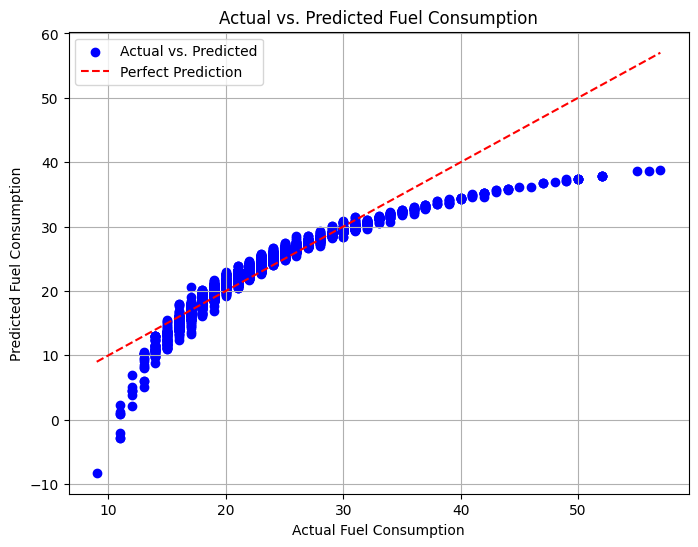

In [40]:
# Visualize actual vs. predicted values
plt.figure(figsize=(8, 6))
plt.scatter(ytest, ypred, color='blue', label='Actual vs. Predicted')
plt.plot([min(ytest), max(ytest)], [min(ytest), max(ytest)], color='red', linestyle='--', label='Perfect Prediction')
plt.title('Actual vs. Predicted Fuel Consumption')
plt.xlabel('Actual Fuel Consumption')
plt.ylabel('Predicted Fuel Consumption')
plt.legend()
plt.grid(True)
plt.show()


This scatter plot compares the actual fuel consumption values against the predicted fuel consumption values from a predictive model or equation. The x-axis represents the actual fuel consumption, while the y-axis shows the predicted fuel consumption.
The blue dots represent individual data points, where each dot corresponds to an actual fuel consumption value and the model's predicted value for that data point.
The dashed red line represents the perfect prediction line, where the predicted values would be equal to the actual values if the model or equation made perfect predictions.
From the plot, we can observe that the blue dots generally follow a linear trend, indicating that the predictive model or equation is performing reasonably well in estimating fuel consumption. However, there are some deviations from the perfect prediction line, suggesting that the predictions are not entirely accurate for all data points.
The data points closer to the perfect prediction line represent more accurate predictions, while those farther away indicate larger discrepancies between the actual and predicted fuel consumption values.
Overall, this plot allows for a visual assessment of the predictive model's performance by comparing the actual and predicted fuel consumption values across the data range. It provides insights into the model's accuracy and can help identify potential areas for improvement or further investigation.

## Support Vector Regression

In [41]:
# Initialize SVR model with Radial Basis Function (RBF) kernel
svr_model = SVR(kernel='rbf')

The Radial Basis Function (RBF) kernel is preferred for initializing Support Vector Regression (SVR) models due to its flexibility in capturing complex nonlinear relationships between features and the target variable. Its universal approximation property enables it to approximate any continuous function accurately, making it suitable for diverse datasets. Additionally, the RBF kernel's implicit feature mapping allows SVR to find nonlinear decision boundaries efficiently, leading to good generalization performance across a wide range of datasets. Overall, the RBF kernel's versatility and effectiveness in capturing intricate data relationships make it a popular choice for SVR applications.

In [42]:
# Train the SVR model on the training data
svr_model.fit(Xtrain, ytrain)

SVR()

In [43]:
# Make predictions on the testing data
ypred = svr_model.predict(Xtest)

In [44]:
# Evaluate model performance
# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(ytest, ypred)
# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(ytest, ypred)
# Calculate R-squared score
r2 = r2_score(ytest, ypred)

# Print evaluation metrics
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Absolute Error: 0.2908959673147772
Mean Squared Error: 0.23002453839161982
R-squared: 0.9939298169240216


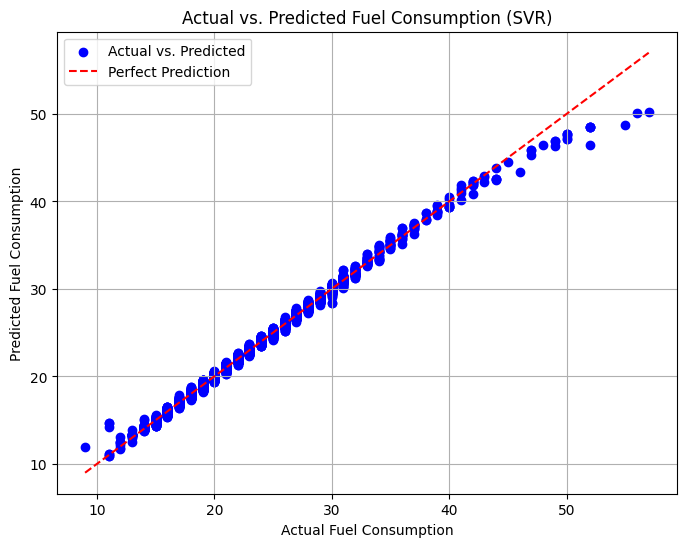

In [45]:
# Visualize actual vs. predicted values
plt.figure(figsize=(8, 6))
plt.scatter(ytest, ypred, color='blue', label='Actual vs. Predicted')
plt.plot([min(ytest), max(ytest)], [min(ytest), max(ytest)], color='red', linestyle='--', label='Perfect Prediction')
plt.title('Actual vs. Predicted Fuel Consumption (SVR)')
plt.xlabel('Actual Fuel Consumption')
plt.ylabel('Predicted Fuel Consumption')
plt.legend()
plt.grid(True)
plt.show()

This scatter plot displays the relationship between actual fuel consumption values on the x-axis and predicted fuel consumption values from a model or algorithm on the y-axis, specifically for a Support Vector Regression (SVR) model.
The blue dots represent individual data points, where each dot corresponds to an actual fuel consumption value and the associated predicted value from the SVR model.
The dashed red line represents the line of perfect prediction, where the predicted values would match the actual values exactly if the model made perfect predictions.
From the plot, we can observe that the blue dots generally follow a linear trend close to the perfect prediction line, indicating that the SVR model is performing well in predicting fuel consumption accurately across most of the data range.
However, there are some deviations from the perfect prediction line, suggesting that the model's predictions are not entirely accurate for all data points. The deviations appear to be slightly larger at higher fuel consumption values.
Overall, the plot suggests that the SVR model is providing reasonably accurate predictions of fuel consumption, with most data points clustering near the perfect prediction line. This visual representation allows for an assessment of the model's performance and can help identify potential areas for further improvement or investigation, especially for data points with larger prediction errors.

##  Save the trained models to disk using joblib

In [46]:
import joblib

joblib.dump(svr_model, 'svr_model.pkl')
joblib.dump(dc, 'dt_model.pkl')
joblib.dump(lr, 'lr_model.pkl')


['lr_model.pkl']

The reason why you see only ['lr_model.pkl'] in the output is likely because the other model files ('svr_model.pkl' and 'dt_model.pkl') have been saved successfully, but the output is not being displayed or captured in your environment.

In [47]:
# List files in the current directory
files_in_directory = os.listdir()

# Check if the model files exist
if 'svr_model.pkl' in files_in_directory:
    print("SVR model file exists.")
else:
    print("SVR model file does not exist.")

if 'dt_model.pkl' in files_in_directory:
    print("Decision Tree model file exists.")
else:
    print("Decision Tree model file does not exist.")

if 'lr_model.pkl' in files_in_directory:
    print("Linear Regression model file exists.")
else:
    print("Linear Regression model file does not exist.")


SVR model file exists.
Decision Tree model file exists.
Linear Regression model file exists.
